In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("insurance.csv", sep=',', encoding='UTF-8')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(keep="first", inplace=True)

In [10]:
df=df.reset_index(drop=True)

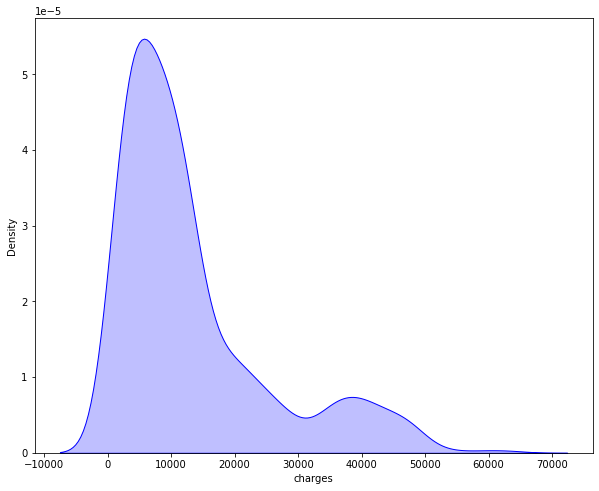

In [11]:
sns.distplot(
    df.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [12]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


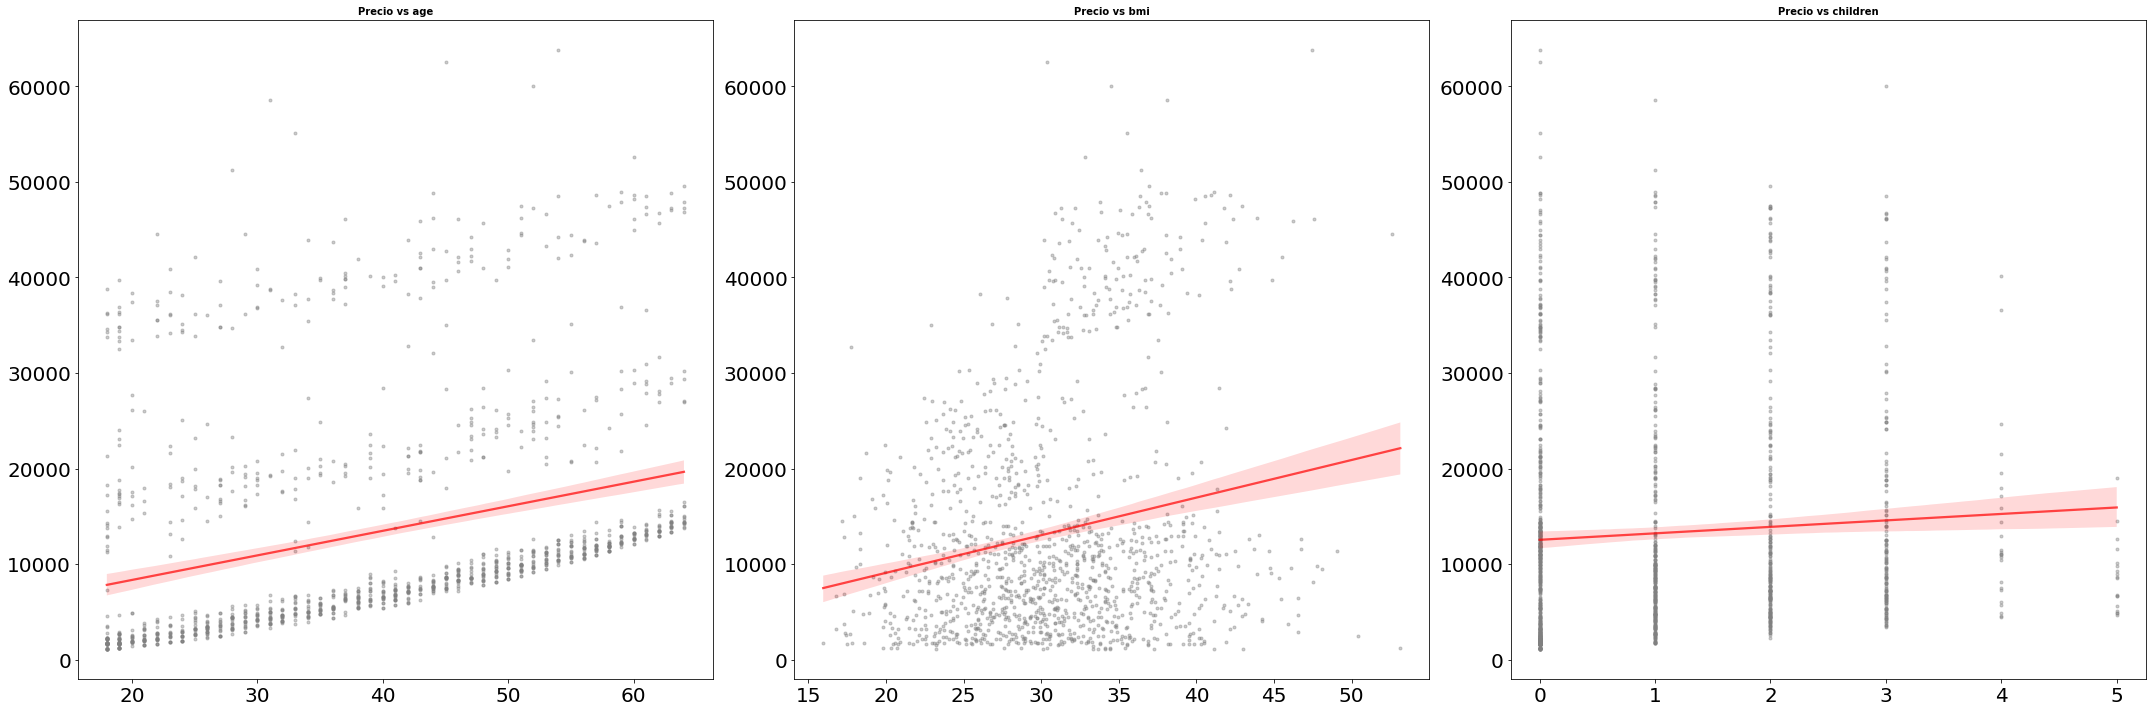

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

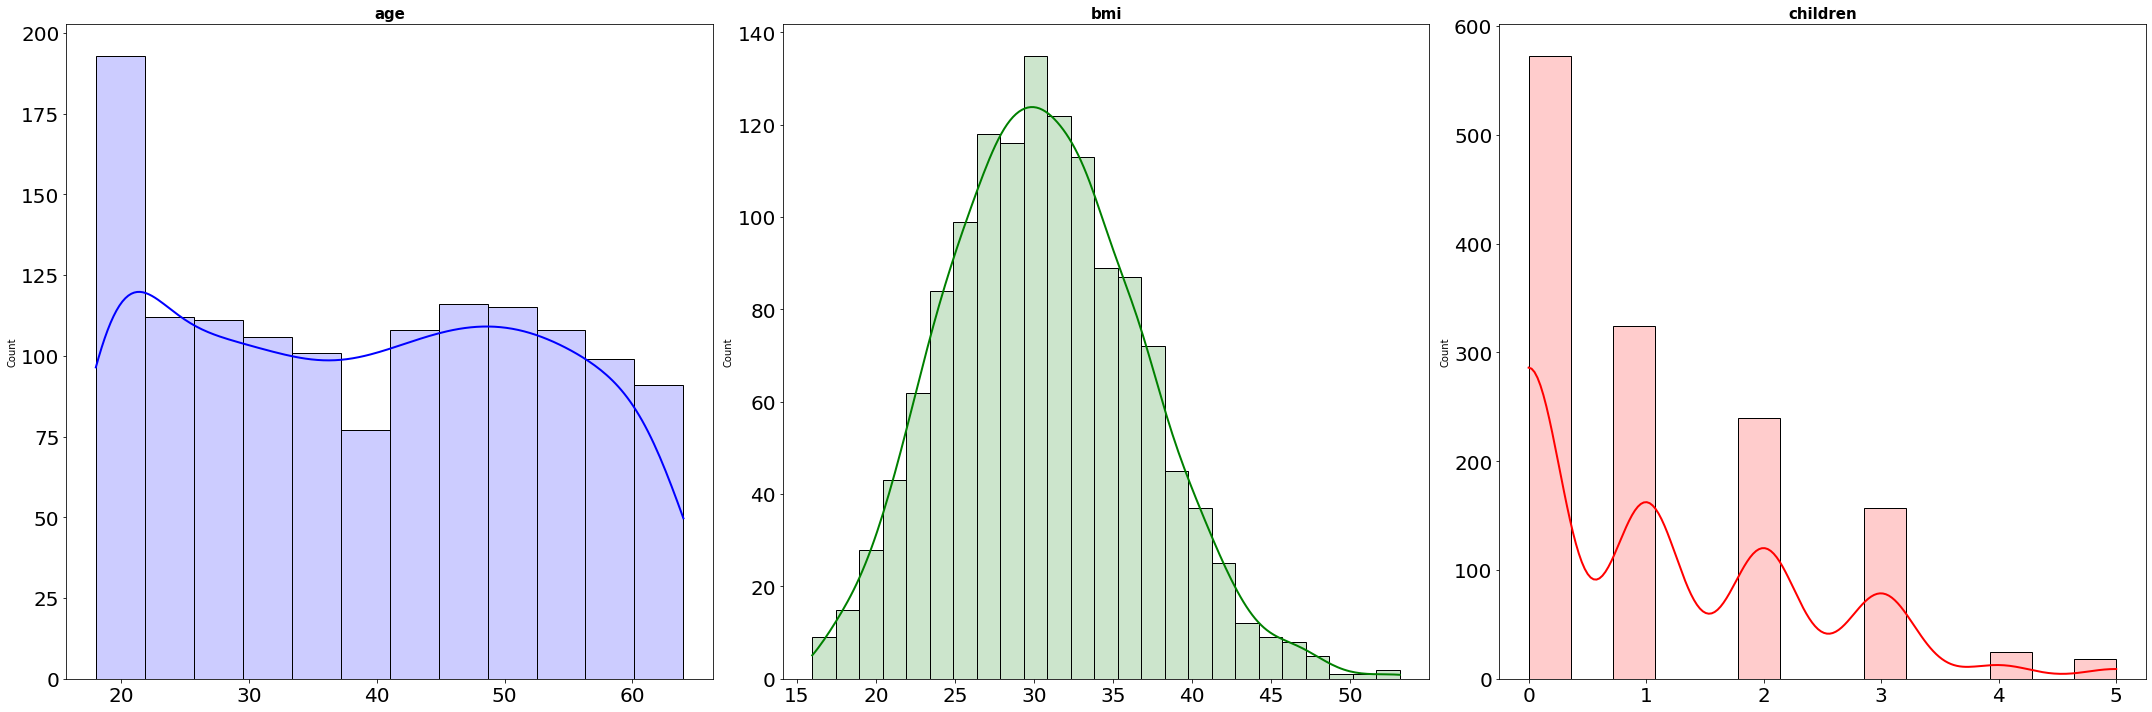

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

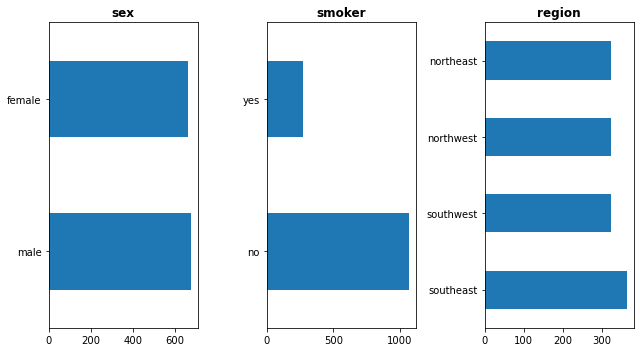

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

<AxesSubplot:xlabel='smoker', ylabel='charges'>

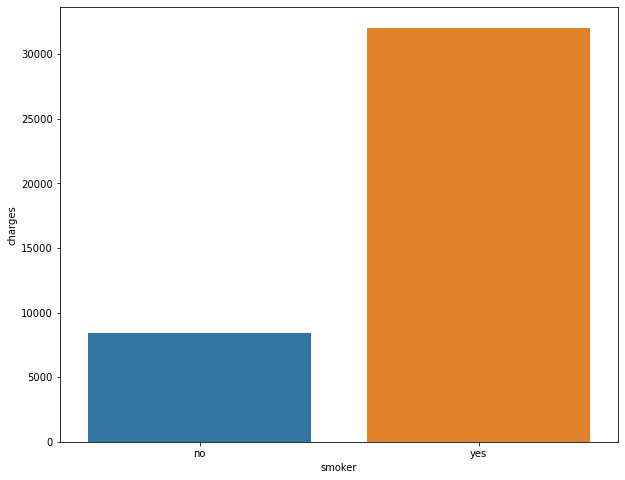

In [16]:
df_relacion_cate=df.groupby("smoker")["charges"].mean().reset_index()
sns.barplot(data=df_relacion_cate, x="smoker", y="charges")

<AxesSubplot:xlabel='region', ylabel='charges'>

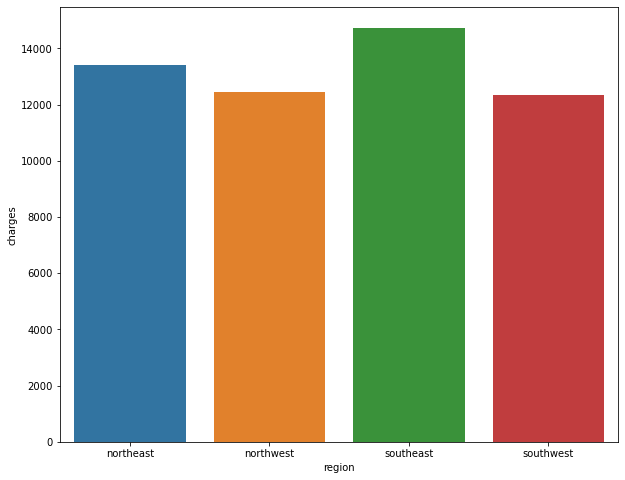

In [17]:
df_relacion_cate=df.groupby("region")["charges"].mean().reset_index()
sns.barplot(data=df_relacion_cate, x="region", y="charges")

<AxesSubplot:xlabel='sex', ylabel='charges'>

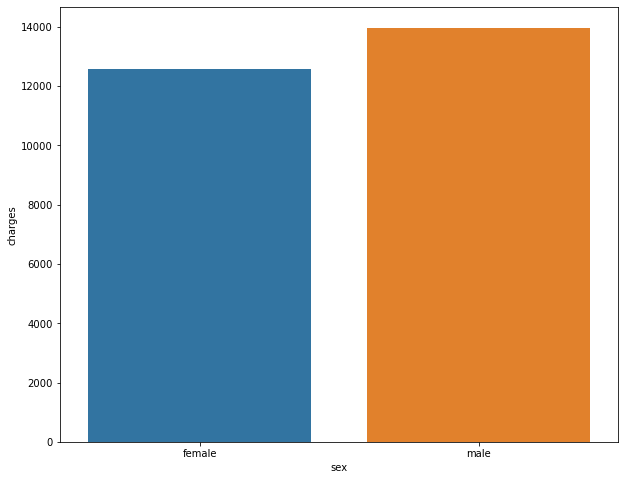

In [18]:
df_relacion_cate=df.groupby("sex")["charges"].mean().reset_index()
sns.barplot(data=df_relacion_cate, x="sex", y="charges")

In [44]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Outliers

In [19]:
df_numericas = df.select_dtypes(include=np.number)

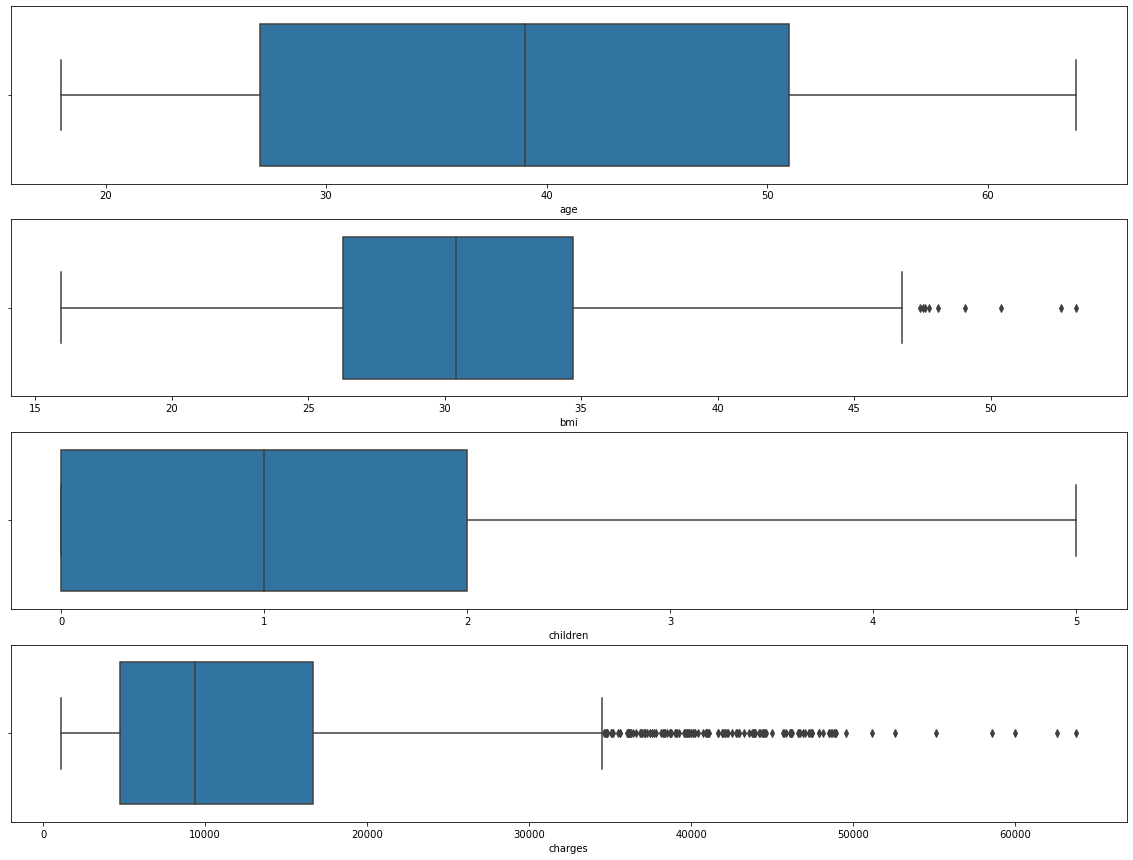

In [20]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [21]:
lista_columnas = df_numericas.columns

In [22]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3+ outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [23]:
dectectar_variables=detectar_outliers(df_numericas, df)

In [24]:
dectectar_variables_bmi=dectectar_variables["bmi"]

In [25]:
dectectar_variables_bmi

[116, 286, 401, 543, 846, 859, 1046, 1087, 1316]

In [26]:
dectectar_variables_charges=dectectar_variables["charges"]

In [27]:
df_sin_outliers2 = df.copy()

In [28]:
final = df_sin_outliers2.drop(df_sin_outliers2.index[dectectar_variables_bmi] )

In [29]:
ind=dectectar_variables["charges"]

In [30]:
mediana = df["charges"].median()
for i in ind: 
    final.loc[i,"charges"] = mediana   

In [31]:
df_numericas = final.select_dtypes(include=np.number)

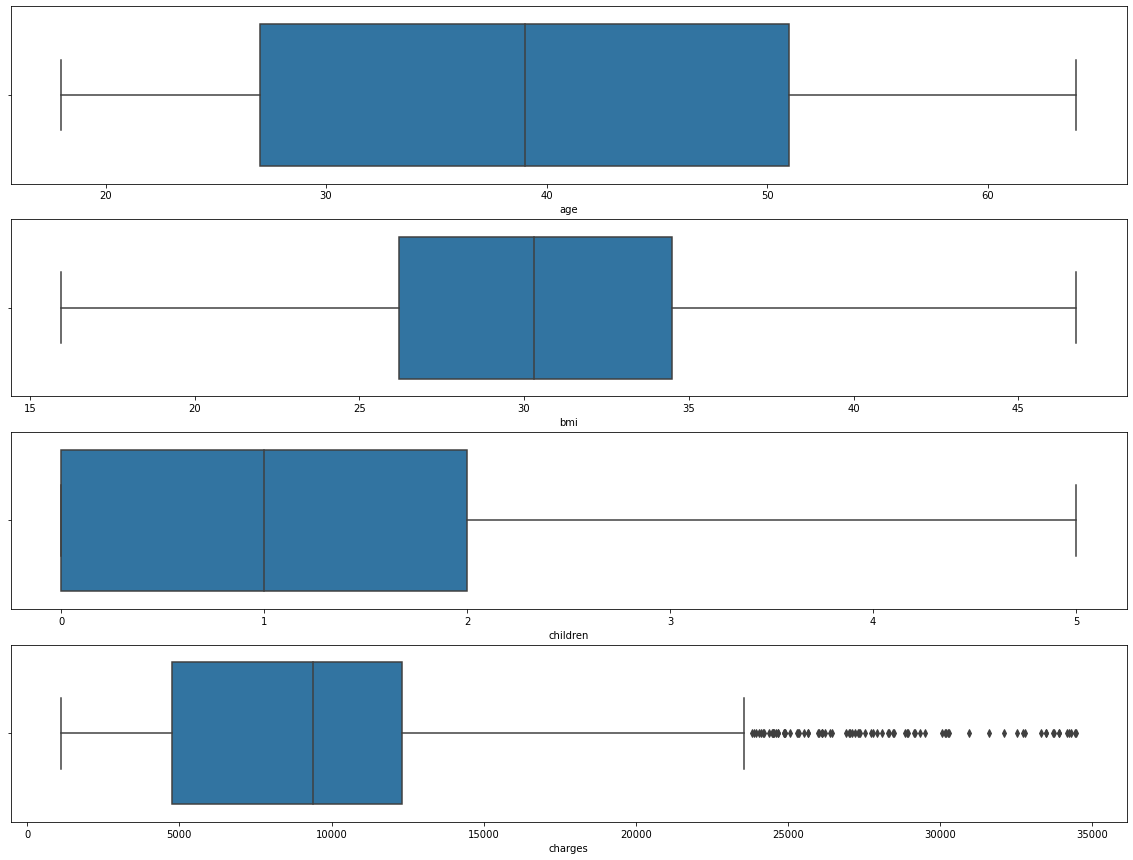

In [32]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

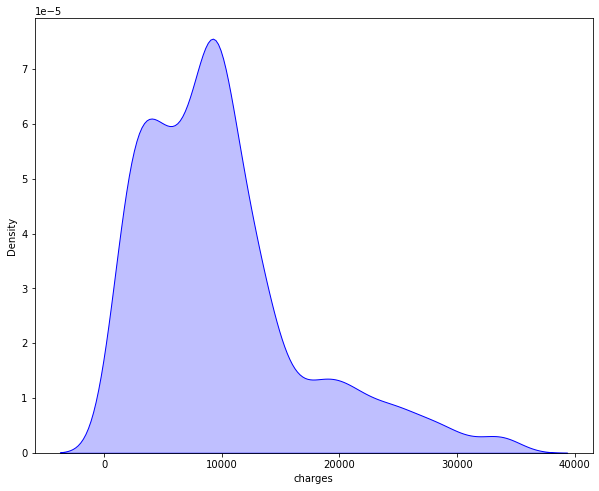

In [33]:
sns.distplot(
    final.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

ENCODING

In [34]:
oh = OneHotEncoder()

In [35]:
transformados = oh.fit_transform(final[["region"]])
type(transformados)

scipy.sparse.csr.csr_matrix

In [36]:
oh_df = pd.DataFrame(transformados.toarray(), dtype = int)
oh_df.head()

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [37]:
oh_df.columns = oh.get_feature_names_out()

In [38]:
final[oh_df.columns] = oh_df
final.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,region_nan
0,19.0,female,27.900,0.0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,0.0
1,18.0,male,33.770,1.0,no,southeast,1725.55230,0.0,0.0,1.0,0.0,0.0
2,28.0,male,33.000,3.0,no,southeast,4449.46200,0.0,0.0,1.0,0.0,0.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,0.0
4,32.0,male,28.880,0.0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,0.0


In [39]:
def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [40]:
final = one_hot_encoder(final, ["sex", "smoker"])

In [41]:
final.head()

,age,bmi,children,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,region_nan,sex_female,sex_male,sex_nan,smoker_no,smoker_yes,smoker_nan
0,19.0,27.900,0.0,southwest,16884.92400,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.0,33.770,1.0,southeast,1725.55230,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,28.0,33.000,3.0,southeast,4449.46200,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,33.0,22.705,0.0,northwest,21984.47061,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,northwest,3866.85520,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [43]:
final.isnull().sum()

age                 3
bmi                 3
children            3
region              3
charges             0
region_northeast    6
region_northwest    6
region_southeast    6
region_southwest    6
region_nan          6
sex_female          6
sex_male            6
sex_nan             6
smoker_no           6
smoker_yes          6
smoker_nan          6
dtype: int64